#Análise de TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) é uma técnica de processamento de linguagem natural usada para representar e avaliar a importância das palavras em um documento ou coleção de documentos, além de converter textos (documentos ou frases) em representações numéricas, permitindo que possam ser tratados por algoritmos de aprendizado de máquina e outros métodos estatísticos que requerem entradas numéricas.
O TF-IDF envolve duas partes principais:
- Term Frequency (TF): Mede a frequência de um termo específico (palavra) em um documento. Quanto mais frequente o termo em um documento, maior o valor do TF.
- Inverse Document Frequency (IDF): Mede o quão raro é um termo em toda a coleção de documentos. Quanto mais raro o termo em todos os documentos, maior o valor do IDF.

A combinação do TF com o IDF resulta em uma pontuação para cada termo em um documento, representando sua importância relativa no contexto da coleção de documentos


In [281]:
!pip install nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from os import close
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Analisando as frequências e os pesos relativos das palavras de dois documentos
- Resumo do livro "O Futuro de uma Ilusão" - Freud
- Resumo do livro "O Homem Revoltado" - Albert Camus

### 0 - Importando os textos

In [266]:
documentos = []
with open('O Futuro de uma Ilusão - Freud.txt', 'r', encoding = 'utf-8') as txt1:
  freud = txt1.read()
  documentos.append(freud)

with open('O Homem Revoltado - Camus.txt', 'r', encoding = 'utf-8') as txt2:
  camus = txt2.read()
  documentos.append(camus)

len(documentos)

2

### 1 - Eliminando as "stop words" e criando a matriz TF-IDF
- Assim fazemos para balancear as palavras dos textos e suas relevâncias, retirando da equação palavras genéricas como 'os', 'a', 'o', etc.

In [267]:
stop_words = set(stopwords.words('portuguese'))
TFIDF = TfidfVectorizer(stop_words=list(stop_words))
matriz = TFIDF.fit_transform(documentos)
TFIDF.get_feature_names_out()

array(['10', '58', '59', ..., 'último', 'única', 'únicos'], dtype=object)

###3 - Transformando a matriz em tabela:

In [268]:
tab = pd.DataFrame(matriz.toarray(), columns=TFIDF.get_feature_names_out())
tab

,10,58,59,abaixo,abalaria,abandono,aberto,abrindo,absolutamente,absoluto,...,âmbito,ângulo,édipo,época,épocas,ímpeto,ódio,último,única,únicos
0,0.012915,0.000000,0.000000,0.000000,0.012915,0.012915,0.012915,0.000000,0.012915,0.009189,...,0.012915,0.000000,0.012915,0.038745,0.038745,0.012915,0.009189,0.012915,0.012915,0.000000
1,0.000000,0.022331,0.022331,0.022331,0.000000,0.000000,0.000000,0.022331,0.000000,0.047666,...,0.000000,0.022331,0.000000,0.000000,0.000000,0.000000,0.031777,0.000000,0.000000,0.022331


###4 - Aplicando uma matriz transposta para melhor visualização
- Em seguida, continuaremos ajustando os dados, nomeando as colunas:

In [269]:
df = tab.transpose()
df

,0,1
10,0.012915,0.000000
58,0.000000,0.022331
59,0.000000,0.022331
abaixo,0.000000,0.022331
abalaria,0.012915,0.000000
...,...,...
ímpeto,0.012915,0.000000
ódio,0.009189,0.031777
último,0.012915,0.000000
única,0.012915,0.000000


In [270]:
df.reset_index(inplace = True)
df.columns = ['Palavra', 'Freud', 'Camus']
df

,Palavra,Freud,Camus
0,10,0.012915,0.000000
1,58,0.000000,0.022331
2,59,0.000000,0.022331
3,abaixo,0.000000,0.022331
4,abalaria,0.012915,0.000000
...,...,...,...
1547,ímpeto,0.012915,0.000000
1548,ódio,0.009189,0.031777
1549,último,0.012915,0.000000
1550,única,0.012915,0.000000


###5 - Removendo as palavras 'freud' e 'camus' da tabela
 - já que podem tornar os dados enviesados por se tratar de um resumo e conter muitas vezes os nomes dos autores

In [271]:
df = df[df['Palavra'] != 'freud']
df = df[df['Palavra'] != 'camus']
df

,Palavra,Freud,Camus
0,10,0.012915,0.000000
1,58,0.000000,0.022331
2,59,0.000000,0.022331
3,abaixo,0.000000,0.022331
4,abalaria,0.012915,0.000000
...,...,...,...
1547,ímpeto,0.012915,0.000000
1548,ódio,0.009189,0.031777
1549,último,0.012915,0.000000
1550,única,0.012915,0.000000


###6 - Verificando as palavras mais relevantes em cada texto:

In [272]:
termo_chave_freud = df.loc[df['Freud'] == df['Freud'].max(), 'Palavra'].values[0]
termo_chave_camus = df.loc[df['Camus'] == df['Camus'].max(), 'Palavra'].values[0]

print(f"O termo-chave mais relevante no resumo sobre o livro de Freud é {termo_chave_freud}")
print(f"O termo-chave mais relevante no resumo sobre o livro de Camus é {termo_chave_camus}")


O termo-chave mais relevante no resumo sobre o livro de Freud é cultura
O termo-chave mais relevante no resumo sobre o livro de Camus é revolta


###E se quisermos saber qual palavra mais relevante que estão presentes nos dois textos, tanto de Freud quanto de Camus?

In [273]:
df_original = df
for index in df.index:
    if (df['Freud'][index] == 0 and df['Camus'][index] != 0):
      df = df.drop(index, axis=0)
    elif (df['Freud'][index] != 0 and df['Camus'][index] == 0):
      df = df.drop(index, axis=0)
df


,Palavra,Freud,Camus
9,absoluto,0.009189,0.047666
14,absurdo,0.027567,0.047666
22,aceitação,0.009189,0.015889
30,acontecimentos,0.009189,0.031777
43,afirma,0.009189,0.015889
...,...,...,...
1525,vezes,0.009189,0.015889
1527,vida,0.045946,0.095332
1532,visto,0.055135,0.015889
1533,visão,0.018378,0.015889


###O novo DataFrame acima possui apenas palavras que são comuns aos dois textos

In [274]:
novo_termo_chave_freud = df.loc[df['Freud'] == df['Freud'].max(), 'Palavra'].values[0]
novo_termo_chave_camus = df.loc[df['Camus'] == df['Camus'].max(), 'Palavra'].values[0]

print(f"O termo-chave comum aos dois textos mais relevante no resumo sobre o livro de Freud é {novo_termo_chave_freud}")
print(f"O termo-chave comum aos dois textos mais relevante no resumo sobre o livro de Camus é {novo_termo_chave_camus}")


O termo-chave comum aos dois textos mais relevante no resumo sobre o livro de Freud é religião
O termo-chave comum aos dois textos mais relevante no resumo sobre o livro de Camus é homem


###Gráfico:
Note que os picos correspondem aos índices das palavras que observamos

Text(0.5, 1.0, 'Tabela apenas com palavras comuns aos dois textos')

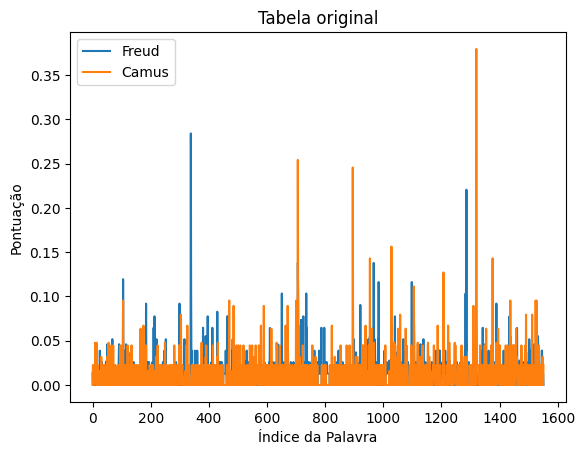

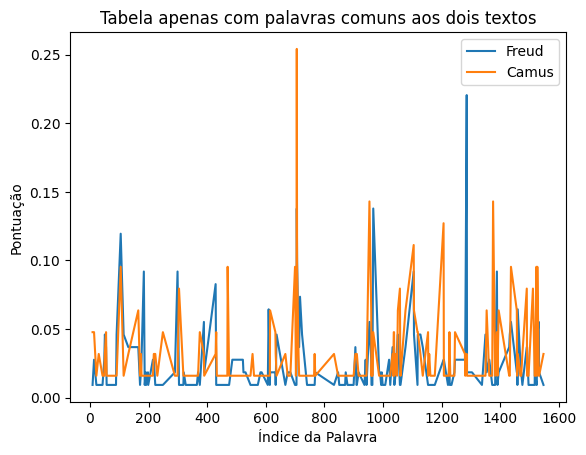

In [286]:
df_original.plot()
plt.xlabel("Índice da Palavra")
plt.ylabel("Pontuação")
plt.title('Tabela original')

df.plot()
plt.xlabel("Índice da Palavra")
plt.ylabel("Pontuação")
plt.title('Tabela apenas com palavras comuns aos dois textos')

###Identificando outros fatores
- Vendo o coeficiente de correlação, talvez podemos interpretar que a correlação fraca que observamos diz respeito ao grau de semelhança entre os assuntos abordados por Freud e Camus.
- Para o leitor mais assíduo dos dois, interpretando dessa maneira acima,entenderia que esse grau de correlação estaria bem adequado para descrever o grau de semelhança dos livros, que tocam minimamente em pontos similares

<ipython-input-292-cbf918d2cdec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap="YlGnBu", vmin=-1, vmax=1)


<Axes: >

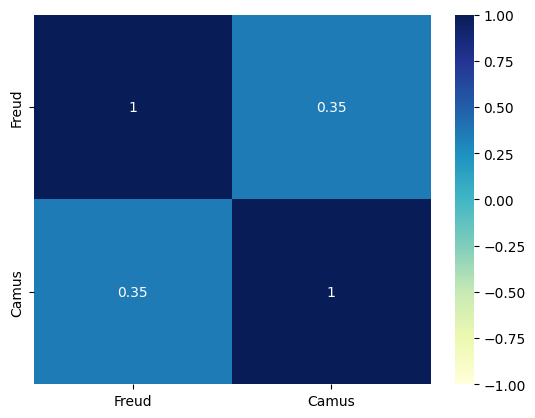

In [292]:
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu", vmin=-1, vmax=1)